# <font color='gold'> ***Análise Exploratória: Incêndios Florestais Brasileiros*** </font> 🔥🌳

<kbd><img src="https://www.preferredbynature.org/sites/default/files/2020-03/FireTopCapture.PNG" width=1000 height=350></kbd>


# <font color='gold'> ***Objetivos da Análise*** 🎯 </font>
---

Nesse projeto, realizaremos uma Análise Exploratória de Dados (EDA) em um [banco de dados](https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil) que contém uma série histórica de incêndios florestais no Brasil em diferentes estados. Mais especificamente, nesse projeto iremos:

- 🎲 Realizar uma análise descritiva das características principais dos dados, como suas dimensões, seus registros e tipos de dados, valores nulos e outliers, etc;

- 🧹 Limpar e tratar os dados;

- 📊 Utilizar de visualizações gráficas para geração de insights e análises mais aprofundadas acerca dos incêndios e suas características.

Como questões centrais que abordaremos nessa pesquisa, temos:

>***1. Quais os estados e regiões mais afetados por incêndios durante toda a série histórica?***
>
>***2. Durante qual período de qual governante brasileiro tivemos mais incêndios no Brasil? e qual o menor valor?***

Entre outras questões que serão abordadas durante o projeto.

# <font color='gold'>***Importando Pacotes e Conhecendo Dados*** 📦🎲</font>
---

In [148]:
# Importando bibliotecas necessárias para a análise:
import pandas as pd    
import numpy as np      
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.font_manager import FontProperties
from matplotlib.pyplot import MaxNLocator, FuncFormatter

# Definindo parâmetros:

# Setando estilo escuro do grid para os gráficos.
sns.set_theme(context='notebook', style='darkgrid')

# Utilizando a biblioteca warnings para retirar avisos da execução do código
# para uma visualização mais limpa.
warnings.filterwarnings('ignore')

# Mostrando versões utilizadas dos pacotes:
print('Pacotes Prontos! Versões Utilizadas:\n')
print(f'Pandas      --> {pd.__version__}')
print(f'Numpy       --> {np.__version__}')
print(f'Matplotlib  --> {matplotlib.__version__}')
print(f'Seaborn     --> {sns.__version__}')

Pacotes Prontos! Versões Utilizadas:

Pandas      --> 1.4.2
Numpy       --> 1.21.5
Matplotlib  --> 3.6.2
Seaborn     --> 0.11.2


In [149]:
# Criando o Dataframe:
data = pd.read_csv(
    'data/amazon.csv', sep=',', encoding='latin-1'
    )

<font color='gold'> ⚠️**Nota** </font>

>A seleção do encoding como [latin-1](https://www.ic.unicamp.br/~stolfi/EXPORT/www/ISO-8859-1-Encoding.html) foi utilizada pois existem caracteres especiais nos dados, assim, a definição do enconding específico foi necessária (em vez do padrão UTF-8).

In [150]:
# Visualizando primeiros 5 registros dos dados:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [151]:
# Visualizando uma sample aleatória dos dados:
data.sample(5)

,year,state,month,number,date
1961,2006,Goias,Março,29.0,2006-01-01
744,2004,Amazonas,Fevereiro,92.0,2004-01-01
4903,2000,Rio,Julho,6.0,2000-01-01
5421,2000,Roraima,Setembro,12.0,2000-01-01
3417,2008,Paraiba,Abril,0.0,2008-01-01


Para termos uma compreensão clara de nossos dados, iremos criar um dicionário de variáveis contendo as colunas do Dataset e a descrição de seu conteúdo:

| Variável   | Conteúdo                                 |
|------------|------------------------------------------|
| `year`     | Ano em que o incêndio florestal ocorreu  |
| `state`    | Estado brasileiro                        |
| `month`    | Mês em que o incêndio ocorreu            |
| `number`   | Quantidade de incêndios reportados       |
| `date`     | Data em que o incêndio foi reportado     |

Com alguns dos registros aparentes, uma característica notável é a aparente duplicata nas colunas. 

- A coluna `year`, que representa o ano em que o incêndio ocorreu e a coluna `date` que informa a data em que o incêndio foi reportado, aparentam possuir os mesmos dados:

    - Quando a coluna year apresenta o ano de 1998, a coluna date informa a data 1998-01-01, e esse padrão da coluna date apenas repetir a coluna year com a adição das datas "1 de Janeiro" se mostra presente em todo dataset como mostrado pelo uso do comando `data.sample(5)`.

Dessa forma, iremos arranjar essas informações de uma maneira diferente:

- Substituir os valores da coluna `month` por nomes em Inglês;

- Dropar a coluna `date` pois utilizaremos a coluna `year` e `month` separadamente;

- Checar o Data type da coluna `year` e constatar se precisa ser alterado.

Como outros ajustes, também iremos renomear as colunas para que tenham a primeira letra maiúscula. Também iremos inserir algumas novas colunas para fortalecer as análises, tendo essas etapas ocorrendo na etapa de limpeza e tratamento dos dados.

Para uma visão mais completa das dimensões dos dados que estamos trabalhando, vamos checar o shape do Dataset:

In [152]:
# Checando dimensões dos dados:
data.shape

(6454, 5)

Temos ***6454 registros*** em ***5 variáveis***.

Também se faz necessária a checagem do tipo de dados dessas variáveis:

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


Com essa visualização, temos algumas informações importantes sobre os dados:

- O dataset não possui null values;

- A coluna `year` está em int64, sendo que o range de valores é de 1998 até 2017, o que significa que podemos alterar esse data type para int16, assim consumindo menos memória na execução dos dados.

Para coletarmos mais informações sobre possíveis outliers e também sobre a distribuição dos dados, utilizaremos o método `.describe()`:

In [154]:
# Descrição estatística dos dados (colunas numéricas):
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6454.0,2007.461729,5.746654,1998.0,2002.0,2007.0,2012.0,2017.0
number,6454.0,108.293163,190.812242,0.0,3.0,24.0,113.0,998.0


Com a descrição estatística das colunas numéricas do dataset, podemos notar:

- Até 75% dos dados (terceiro quantil) relacionados ao número de incêndios relatados vão até 113, já o valor máximo é de 998, um outlier claro.

Nesse caso, outliers são esperados como "normais", pois se tratando de número de focos de incêndios florestais num país continental como o Brasil, não existe uma regra ou uma lógica exata que dita o intervalo desses números, tendo muitas variávies que os influenciam (ação humana mais intensa ou menos intensa numa determinada região num determinado período de tempo, uma estação do ano muito mais fria ou quente do que o normal, etc).

Sendo assim, os registros de número de focos de incêndio não serão alterados, pois buscamos ter uma visão completa desses dados.

Também iremos coletar informações sobre as colunas categóricas do dataset:

In [155]:
# Descrição estatística dos dados (colunas categóricas):
data.describe(exclude='number').T

,count,unique,top,freq
state,6454,23,Rio,717
month,6454,12,Janeiro,541
date,6454,20,1998-01-01,324


Com isso, temos a informação de que o estado que mais vezes consta no dataset é o Rio de Janeiro, com 717 registros diferentes de focos de incêndio.

Também temos a informação de que o mês mais comum nos dados é Janeiro.

É importante termos em mente que isso não necessariamente significa que o estado do Rio de Janeiro e o mês de Janeiro são os que mais possuem focos de incêndio no geral. Apenas estamos indicando que essas duas informações são as mais presentes nos dados, sem considerarmos a dimensão e quantidade dos focos de incêndio atribuidos a eles.

# <font color='gold'> ***Limpeza e Tratamento*** 🗃️ </font>
---

Nessa etapa, iremos realizar todas as modificações e tratamentos que descrevemos anteriormente. Começando pelo refatoramento das colunas `year`, `date` e `month`. Para isso, iremos primeiramente definir uma função para iterar sobre nossos dados e passar os meses de Português para Inglês:

## **Reformulando formato de data**

In [156]:
def month_translator(df: pd.DataFrame) -> pd.DataFrame:
    '''Essa função pega um Dataframe fornecido pelo usuário e altera
    os valores dos meses de Português para Inglês.

    Utilizando uma função lambda, checamos cada string dos meses, onde cada
    uma delas recebe o nome apropriado.
    '''
    df['month'] = df['month'].apply(
        lambda month_id:
            'January' if (month_id == 'Janeiro') else
            'February' if (month_id == 'Fevereiro') else
            'March' if (month_id == 'Março') else
            'April' if (month_id == 'Abril') else
            'May' if (month_id == 'Maio') else
            'June' if (month_id == 'Junho') else
            'July' if (month_id == 'Julho') else
            'August' if (month_id == 'Agosto') else
            'September' if (month_id == 'Setembro') else
            'October' if (month_id == 'Outubro') else
            'November' if (month_id == 'Novembro') else
            'December'
        )  

    return df 


Antes de iniciarmos as modificações nos dados, é uma boa prática criar uma cópia dos mesmos, assim se preservam os dados no formato original e se cria outra versão para a limpeza e manipulação:

In [157]:
# Criando cópia dos dados para limpeza:
data_clean = data.copy()

In [158]:
# Aplicando a função no dataset:
data_clean = month_translator(data_clean)

# Exibindo novos resultados:
data_clean.sample(5)

,year,state,month,number,date
197,2015,Acre,October,905.00,2015-01-01
2797,2005,Mato Grosso,September,1.87,2005-01-01
3870,2003,Pernambuco,March,9.00,2003-01-01
4988,2005,Rio,November,227.00,2005-01-01
2024,2009,Goias,June,179.00,2009-01-01


Agora que temos meses em Inglês, vamos dropar a coluna `date` e ajustar o data type da coluna `year`:

In [159]:
# Excluindo coluna date:
data_clean = data_clean.drop('date', axis=1)

In [160]:
# Ajustando data type da coluna year:
data_clean = data_clean.astype({'year': 'int16'})

In [161]:
# Checando novo formato dos dados:
data_clean.sample(5)

,year,state,month,number
1455,1998,Distrito Federal,February,0.0
3353,2004,Paraiba,January,33.0
89,2007,Acre,May,1.0
3753,2005,Paraiba,September,386.0
4698,2014,Rio,August,21.0


In [162]:
# Checando novos dtypes:
data_clean.dtypes

year        int16
state      object
month      object
number    float64
dtype: object

## **Criando novas variáveis**

Com os dados no formato atual, já se é possível realizar algumas análises, porém, visamos nesse projeto uma visão mais aprofundada dos incêndios florestais no Brasil, e por essa razão se faz necessária a criação de algumas novas variáveis para nossos dados, sendo elas:

- <font color='gold'>**Coluna `UF`**</font> > A coluna que representará a Unidade da Federação do estado (SP, RJ, BA, etc). Essa coluna será criada pois os nomes dos estados não podem ser confiados de estarem no formato adequado para criação de Dashboards e análises, como exemplo, o estado do Rio de Janeiro apenas consta com o nome 'Rio' no dataset. Sendo assim, a criação da coluna UF vem como forma de padronizar esses indicadores de estado.

- <font color='gold'>**Coluna `Region`**</font> > A coluna que representará a região brasileira na qual o estado pertence (Norte, Sul, Sudeste, etc). Essa coluna será concebida como forma de aprofundar as análises posteriores, nos possibilitando ter respostas acerca de quais regiões foram mais e menos afetadas pelos incêndios.

- <font color='gold'>**Coluna `President`**</font> > A coluna que representará o nome de qual mandatário brasileiro estava em vigência quando os incêndios ocorreram. Essa coluna nos permitirá ter um olhar mais histórico acerca desses registros, onde poderemos comparar as diferentes gestões dos diversos mandatários nesses períodos e identificar quais passaram por um período de mais ou menos incêndios.

- <font color='gold'>**Coluna `Season`**</font> > A coluna que representará em qual estação do ano o incêndio florestal ocorreu. Ela servirá para aprofundarmos mais as análises e compreendermos a correlação entre estações do ano e incêndios florestais.

### **Criando coluna: UF**

Para a criação da coluna `UF`, iremos criar uma função que percorre os dados e atribui a UF correta para seu respectivo estado, para isso, vamos checar quais são os estados presentes no Dataset:

In [163]:
# Checando quais estados aparecem nos dados:
states = list(data_clean['state'].unique())

for (index, names) in enumerate(states, start=1):
    print(f'Estado {index:2} --> {names}')

Estado  1 --> Acre
Estado  2 --> Alagoas
Estado  3 --> Amapa
Estado  4 --> Amazonas
Estado  5 --> Bahia
Estado  6 --> Ceara
Estado  7 --> Distrito Federal
Estado  8 --> Espirito Santo
Estado  9 --> Goias
Estado 10 --> Maranhao
Estado 11 --> Mato Grosso
Estado 12 --> Minas Gerais
Estado 13 --> Pará
Estado 14 --> Paraiba
Estado 15 --> Pernambuco
Estado 16 --> Piau
Estado 17 --> Rio
Estado 18 --> Rondonia
Estado 19 --> Roraima
Estado 20 --> Santa Catarina
Estado 21 --> Sao Paulo
Estado 22 --> Sergipe
Estado 23 --> Tocantins


É aparente que nem todos os estados da nação estão presentes nos dados. Temos 23 estados diferentes porém o Brasil possuí 27 unidades federativas. 

Outro fator relevante é o registro errado do estado de Piauí, que consta apenas como 'Piau'. Esse registro errado apenas fortalece o motivo da qual estamos criando a coluna UF, para padronizar esses dados e garantir que todos estão corretamente representados.

Antes de definir nossa função de criação das UFs, vamos corrigir essa entrada do estado de Piauí e também adicionar o nome completo do estado do Rio de Janeiro:

In [164]:
# Corrigindo registros de Rio de Janeiro e Piauí:
data_clean['state'] = (
    data_clean['state']
    .replace(['Rio', 'Piau'], ['Rio de Janeiro', 'Piaui'])
    )

# Checando os novos registros:
data_clean.query('state == "Rio de Janeiro" | state == "Piaui"').sample(5)

,year,state,month,number
4426,2001,Rio de Janeiro,July,57.0
4555,2011,Rio de Janeiro,January,15.0
4289,2003,Piaui,December,459.0
4675,2011,Rio de Janeiro,July,0.0
4497,2012,Rio de Janeiro,October,163.0


Com os estados presentes nos dados de maneira correta, podemos definir nossa função de atribuição das UFs:

In [165]:
def set_uf(df: pd.DataFrame) -> pd.DataFrame:
    '''Essa função recebe um dataframe, itera sobre os registros e
    atribui aos estados suas respectivas UFs.
    
    Para isso, criamos um dicionário que contém o par 'estado: UF' e 
    e atribuímos diretamente esses valores a nova coluna.
    '''
    state_uf = {
        'Acre': 'AC',
        'Alagoas': 'AL',
        'Amapa': 'AP',
        'Amazonas': 'AM',
        'Bahia': 'BA',
        'Ceara': 'CE',
        'Distrito Federal': 'DF',
        'Espirito Santo': 'ES',
        'Goias': 'GO',
        'Maranhao': 'MA',
        'Mato Grosso': 'MT',
        'Minas Gerais': 'MG',
        'Pará': 'PA',
        'Paraiba': 'PB',
        'Pernambuco': 'PE',
        'Piaui': 'PI',
        'Rio de Janeiro': 'RJ',
        'Rondonia': 'RO',
        'Roraima': 'RR',
        'Santa Catarina': 'SC',
        'Sao Paulo': 'SP',
        'Sergipe': 'SE',
        'Tocantins': 'TO'
        }

    df['UF'] = df['state'].map(state_uf)

    return df

In [166]:
# Aplicando a função:
data_clean = set_uf(data_clean)

# Exibindo resultados:
data_clean.sample(5)

,year,state,month,number,UF
3654,2006,Paraiba,April,49.000,PB
4551,2007,Rio de Janeiro,January,63.000,RJ
4872,2009,Rio de Janeiro,May,177.000,RJ
3284,2014,Pará,September,6.787,PA
4424,1999,Rio de Janeiro,July,14.000,RJ


### **Criando coluna: Region**

Para adicionar as regiões de cada estado, vamos criar uma função que itera sobre os registros e atribui a cada estado sua devida região:

In [167]:
def set_region(df: pd.DataFrame) -> pd.DataFrame:
    '''Essa função adiciona as regiões dos respectivos
    estados com base em sua UF.
    
    Delimita-se uma lista com os estados para cada região e utiliza-se
    uma função lambda para aplicar ao dataset.
    '''
    regiao_norte = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']
    regiao_nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'SE']
    regiao_centro_oeste = ['DF', 'GO', 'MT']
    regiao_sudeste = ['ES', 'MG', 'RJ', 'SP']
    regiao_sul = ['SC']

    df['Region'] = df['UF'].apply(
        lambda state:
            'Norte' if state in regiao_norte else
            'Nordeste' if state in regiao_nordeste else
            'Centro Oeste' if state in regiao_centro_oeste else
            'Sudeste' if state in regiao_sudeste else
            'Sul'
        )

    return df

In [168]:
# Aplicando a função:
data_clean = set_region(data_clean)

# Checando novos dados:
data_clean.sample(5)

,year,state,month,number,UF,Region
4661,2017,Rio de Janeiro,June,3.0,RJ,Sudeste
5711,2011,Santa Catarina,November,79.0,SC,Sul
6222,2005,Tocantins,January,66.0,TO,Norte
1544,2007,Distrito Federal,June,21.0,DF,Centro Oeste
3803,2015,Paraiba,November,18.0,PB,Nordeste


### **Criando coluna: President**

Para podermos inserir nos dados o mandatário vigente durante os registros de incêndio florestal, primeiro iremos checar o intervalo de tempo que temos nos dados:

In [169]:
# Checando intervalo de anos:
print(f'Ano mínimo: {data_clean.year.min()}')
print(f'Ano máximo: {data_clean.year.max()}')

Ano mínimo: 1998
Ano máximo: 2017


Com os anos definidos, utilizando uma [lista com todos os mandatários](https://pt.wikipedia.org/wiki/Lista_de_presidentes_do_Brasil) do Brasil, iremos atribuí-los aos respectivos períodos que constam nos dados. Para isso, utilizaremos uma função:

In [170]:
def set_president(df: pd.DataFrame) -> pd.DataFrame:
    '''Essa função itera sobre os anos do dataset e atribuí a uma nova coluna
    o nome do mandatário vigente durante esse período.

    Formato retornado: nome_presidente (mandato)
    '''
    df['President'] = df['year'].apply(
        lambda year:
            'FHC (pri. mand.)' if (year == 1998) else
            'FHC (seg. mand.)' if (year >= 1999) and (year <= 2002) else
            'Lula (pri. mand.)' if (year >= 2003) and (year <= 2006) else
            'Lula (seg. mand.)' if (year >= 2007) and (year <= 2010) else
            'Dilma (pri. mand.)' if (year >= 2011) and (year <= 2013) else
            'Dilma (seg. mand.)' if (year >= 2014) and (year <= 2016) else
            'Temer'
        )

    return df


In [171]:
# Aplicando a função:
data_clean = set_president(data_clean)

# Visualizando novos resultados:
data_clean.sample(5)

,year,state,month,number,UF,Region,President
2007,2012,Goias,May,103.00,GO,Centro Oeste,Dilma (pri. mand.)
4169,2003,Piaui,June,88.00,PI,Nordeste,Lula (pri. mand.)
4293,2007,Piaui,December,317.00,PI,Nordeste,Lula (seg. mand.)
3063,2012,Minas Gerais,October,3.97,MG,Sudeste,Dilma (pri. mand.)
4903,2000,Rio de Janeiro,July,6.00,RJ,Sudeste,FHC (seg. mand.)


### **Criando coluna: Season**

Para podermos compreender ainda mais a periodicidade dos incêndios florestais, vamos criar uma coluna que informa em qual estação do ano o registro do incêndio ocorreu. Para isso, vamos criar a seguinte função:

In [172]:
def set_season(df: pd.DataFrame) -> pd.DataFrame:
    '''Essa função itera sobre o Dataframe e cria uma nova coluna
    para estações do ano com base no mês em que o registro foi feito.
    '''
    spring = ['March', 'April', 'May']
    summer = ['June', 'July', 'August']
    autumn = ['September', 'October', 'November']
    winter = ['December', 'January', 'February']

    df['Season'] = df['month'].apply(
        lambda month:
            'Spring' if month in spring else
            'Summer' if month in summer else
            'Autumn' if month in autumn else
            'Winter'
        )

    return df

In [173]:
# Aplicando a função:
data_clean = set_season(data_clean)

# Visualizando novos resultados:
data_clean.sample(5)

,year,state,month,number,UF,Region,President,Season
16,2014,Acre,January,0.0,AC,Norte,Dilma (seg. mand.),Winter
2239,2005,Maranhao,May,74.0,MA,Nordeste,Lula (pri. mand.),Spring
2844,2012,Mato Grosso,November,115.0,MT,Centro Oeste,Dilma (pri. mand.),Autumn
4304,1999,Rio de Janeiro,January,0.0,RJ,Sudeste,FHC (seg. mand.),Winter
4138,2012,Piaui,April,119.0,PI,Nordeste,Dilma (pri. mand.),Spring


Com todas as colunas necessárias criadas para as análises, vamos realizar os últimos ajustes nos dados, isto é, renomear as colunas e reposicioná-las no dataset:

### **Renomeando e Reposicionando Colunas**

In [174]:
# Renomeando colunas utilizando um dicionário:
data_clean = (
    data_clean
    .rename(
        columns={
            'year': 'Year',
            'state': 'State',
            'month': 'Month',
            'number': 'Num_wild_fires'
            }
        )
    )

# Reposicionando colunas:
data_clean = data_clean.loc[
    :, 
    ['State', 'UF', 'Region', 'Num_wild_fires', 
    'Year', 'Month', 'Season', 'President']
    ]
# Visualizando novos dados:
data_clean.head()

,State,UF,Region,Num_wild_fires,Year,Month,Season,President
0,Acre,AC,Norte,0.0,1998,January,Winter,FHC (pri. mand.)
1,Acre,AC,Norte,0.0,1999,January,Winter,FHC (seg. mand.)
2,Acre,AC,Norte,0.0,2000,January,Winter,FHC (seg. mand.)
3,Acre,AC,Norte,0.0,2001,January,Winter,FHC (seg. mand.)
4,Acre,AC,Norte,0.0,2002,January,Winter,FHC (seg. mand.)


Com as colunas nomeadas e reorganizadas temos uma padronização melhor, onde elas descrevem bem o conteúdo das variáveis e também, iniciam-se com letra maiúscula.

Agora, vamos salvar os dados tratados para podermos utilizá-los no Power BI para criação de Dashboards:

In [175]:
# Salvando os dados tratados:
data_clean.to_csv('amazon_clean.csv', sep=',', encoding='latin-1', index=False)

# <font color='gold'> ***Análises e Plots*** 📊 </font>
---

Com os dados devidamente tratados, podemos dar início as análises e plotagens gráficas. Como perguntas centrais a serem respondidas, teremos:

***<font color='gold'>1.</font> Quais os estados e regiões mais e menos afetados por incêndios durante toda a série histórica?***

***<font color='gold'>2.</font> Durante qual período de qual governante brasileiro tivemos mais e menos incêndios no Brasil?***

***<font color='gold'>3.</font> Como o número de incêndios nas diferentes regiões e estados se comportam ao longo da série histórica?***

***<font color='gold'>4.</font> Qual a estação do ano em que se houve mais e menos incêndios no Brasil?***

## **<font color='gold'>1.</font> Quais os estados e regiões mais e menos afetados por incêndios durante toda a série histórica?**

Para podermos compreender quais foram os estados e regiões mais e menos afetados por incêndios florestais na série histórica, primeiro vamos criar um rankeamento dos estados e das regiões:

### **Rankeamento dos Estados**

In [176]:
# Agrupando dados para rankeamento dos estados:
states_rank = (
    data_clean
    .groupby('State')['Num_wild_fires']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .rename(
        columns={
            'State': 'Estado',
            'Num_wild_fires': 'Total de Incêndios'
            }
        )
    )

# Visualizando ranking e definindo um gradiente nos valores:
states_rank.style.background_gradient(
    subset='Total de Incêndios',
    cmap='YlOrRd'
    )

,Estado,Total de Incêndios
0,Mato Grosso,96246.028000
1,Paraiba,52435.918000
2,Sao Paulo,51121.198000
3,Rio de Janeiro,45160.865000
4,Bahia,44746.226000
5,Piaui,37803.747000
6,Goias,37695.520000
7,Minas Gerais,37475.258000
8,Tocantins,33707.885000
9,Amazonas,30650.129000


Com a tabela já temos como identificar as respostas que queríamos:

- O estado mais afetado pelos incêndios é de longe `Minas Gerais` com cerca de 960 mil registros na série histórica, seguido pelo estado da `Paraíba` bem atrás com cerca de 524 mil registros.

- Já o estado menos afetado na série histórica é `Sergipe` com apenas 3237 registros.

Para termos uma vizualização mais apropriada dos dados, utilizaremos das bibliotecas Matplotlib e Seaborn:

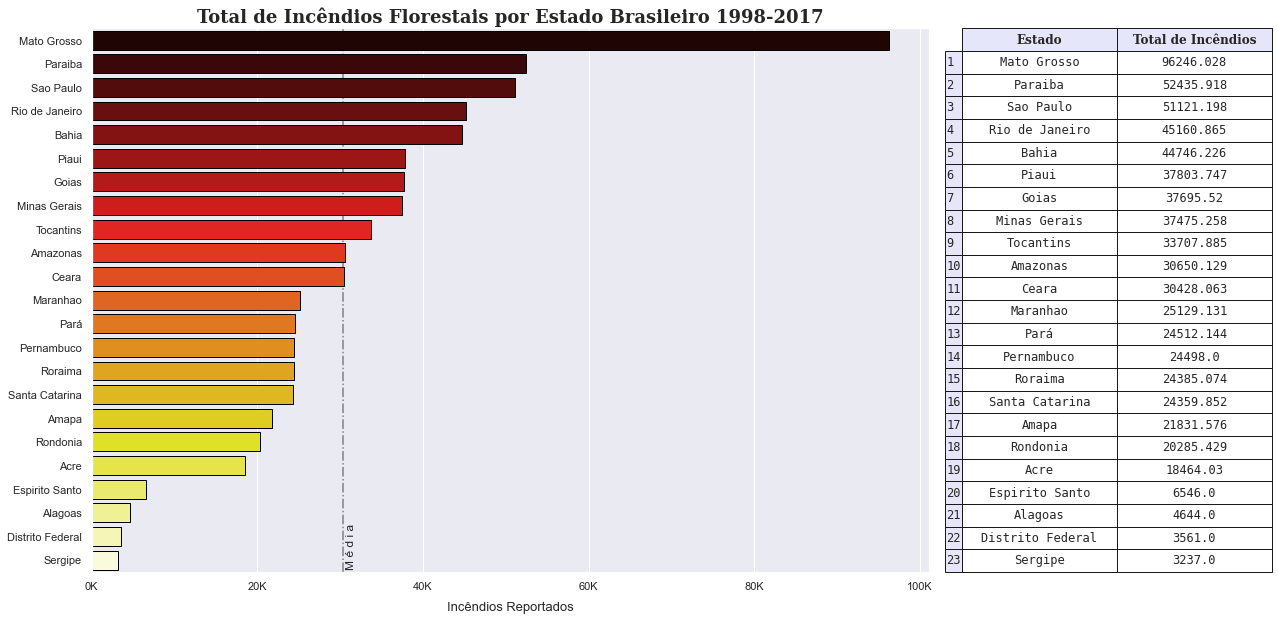

In [177]:
# Definindo parâmetros de tamanho:
fig, ax = plt.subplots(figsize=(15, 10))

# Plotando um barplot utilizando Seaborn:
sns.barplot(data=states_rank, x='Total de Incêndios', y='Estado',
            edgecolor='black', zorder=2, palette='hot')

# Definindo título e ajustando labels nos eixos X e Y:
plt.title('Total de Incêndios Florestais por Estado Brasileiro 1998-2017', 
           fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'})

plt.xlabel('Incêndios Reportados', 
            fontsize=13, labelpad=10)

ax.set_xticklabels(['0K', '20K', '40K', '60K', '80K', '100K'])
plt.ylabel('')

# Adicionando linha de média:
plt.axvline(x=states_rank['Total de Incêndios'].mean(), 
            ymin=0, ymax=1, linewidth=1.5, linestyle="dashdot", 
            color='gray', zorder=1)

plt.annotate('M é d i a', fontsize=12, 
              xy=(states_rank['Total de Incêndios'].mean() + 300, 22.3),
              rotation=90)

# Adicionando tabela com dados:
row_color = np.full(len(states_rank.index), 'lavender')
col_color = np.full(len(states_rank.columns), 'lavender')
row_index = np.arange(1,24)

table = plt.table(cellText=states_rank.values, cellLoc='center', rowLabels=row_index,
                  colLabels=states_rank.columns, bbox=[1.04, 0, 0.37, 1],
                  rowColours=row_color, colColours=col_color)

# Alterando propriedades dos elementos textuais da tabela:
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(fontproperties=FontProperties(weight='bold', size=15, family='serif'))
    else:
        cell.set_text_props(fontproperties=FontProperties(size=13, family='monospace'))      

plt.show()

### **Rankeamento das Regiões**

In [178]:
# Agrupando dados para rankeamento das regiões:
region_rank = (
    data_clean
    .groupby('Region')['Num_wild_fires']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .rename(
        columns={
            'Region': 'Região',
            'Num_wild_fires': 'Total de Incêndios'
            }
        )
    )

# Visualizando ranking e definindo um gradiente nos valores:
region_rank.style.background_gradient(subset='Total de Incêndios', 
                                      cmap='YlOrRd')

,Região,Total de Incêndios
0,Nordeste,222922.085000
1,Norte,173836.267000
2,Sudeste,140303.321000
3,Centro Oeste,137502.548000
4,Sul,24359.852000


Podemos ver que mesmo que o estado de Minas Gerais é disparado o que mais teve registros de incêndios florestais nos dados, a `Região Nordeste` foi a que teve mais incêndios no geral. Isso é importante para destacar que uma abordagem única para uma questão nunca é boa, pois pode esconder dados relevantes. Nesse caso, se não tivessemos buscado compreender tanto qual estado tanto qual região possuiu o maior número de incêndios, poderiamos ficar com a impressão de que, por causa do estado do Mato Grosso ser de longe o com mais registros, a região Centro Oeste seria a mais afetada, o que nosso rankeamento por regiões desprova.

Como mesmo procedimento, iremos plotar o mesmo gráfico de barras porém agora para as regiões:

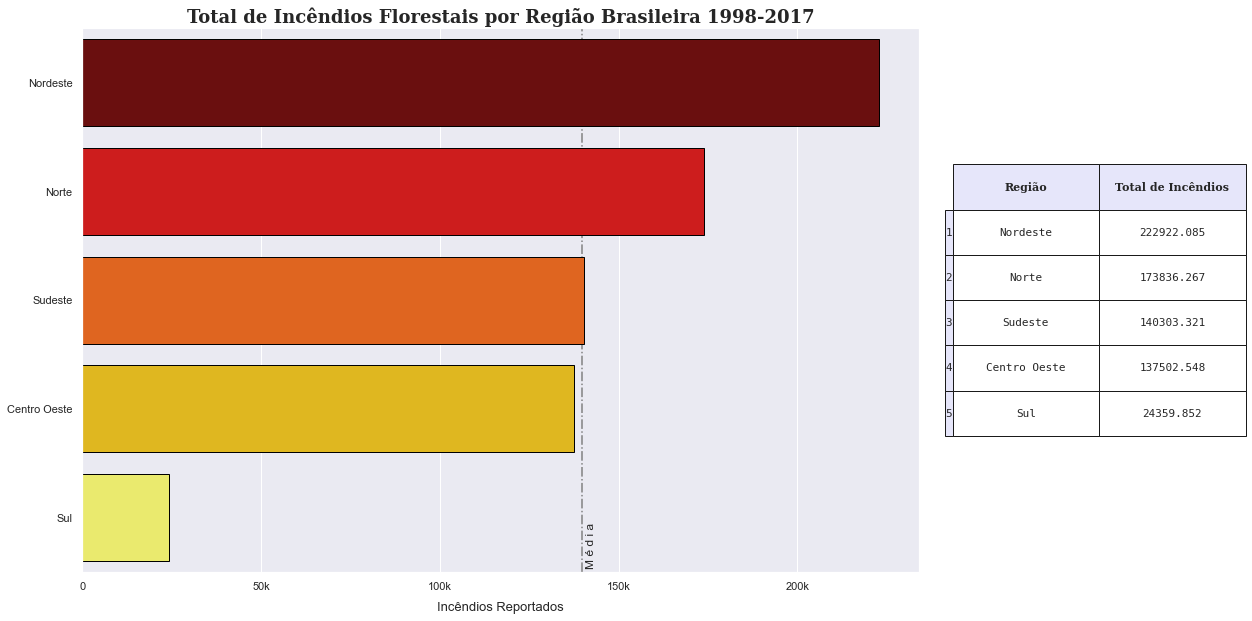

In [179]:
# Definindo parâmetros de tamanho:
fig, ax = plt.subplots(figsize=(15, 10))

# Plotando um barplot utilizando Seaborn:
sns.barplot(data=region_rank, x='Total de Incêndios', y='Região',
            edgecolor='black', zorder=2, palette='hot')

# Definindo título e ajustando labels nos eixos X e Y:
plt.title('Total de Incêndios Florestais por Região Brasileira 1998-2017', 
           fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'})

plt.xlabel('Incêndios Reportados', 
            fontsize=13, labelpad=10)

ax.set_xticklabels(['0', '50k', '100k', '150k', '200k'])
plt.ylabel('')

# Adicionando linha de média:
plt.axvline(x=region_rank['Total de Incêndios'].mean(), 
            ymin=0, ymax=1, linewidth=1.5, linestyle="dashdot",
            color='gray', zorder=1)

plt.annotate('M é d i a', fontsize=12, 
              xy=(region_rank['Total de Incêndios'].mean() + 1000, 4.45), 
              rotation=90)

# Adicionando tabela com dados:
row_color = np.full(len(region_rank.index), 'lavender')
col_color = np.full(len(region_rank.columns), 'lavender')
row_index = np.arange(1,6)

table = plt.table(cellText=region_rank.values, cellLoc='center',
                  rowLabels=row_index, colLabels=region_rank.columns,
                  bbox=[1.04, 0.25, 0.35, 0.5], rowColours=row_color,
                  colColours=col_color)

# Alterando propriedades dos elementos textuais da tabela:
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(fontproperties=FontProperties(weight='bold', size=15, family='serif'))
    else:
        cell.set_text_props(fontproperties=FontProperties(size=13, family='monospace'))     

plt.show()

## **<font color='gold'>2.</font> Durante qual período de qual governante brasileiro tivemos mais e menos incêndios no Brasil?**

Para podermos analisar a distribuição de incêndios florestais por governante, primeiro iremos coletar os dados necessários para a análise, sendo eles o total de incêndios por mandato. Após isso, iremos demonstrar visualmente os resultados:

In [180]:
# Coletando dados necessários: 
president_rank = (
    data_clean
    .groupby('President', as_index=False)['Num_wild_fires']
    .sum()
    .sort_values(by='Num_wild_fires', ascending=False)
    )

president_rank

,President,Num_wild_fires
4,Lula (pri. mand.),150050.963
5,Lula (seg. mand.),138571.004
1,Dilma (seg. mand.),123041.704
3,FHC (seg. mand.),120696.284
0,Dilma (pri. mand.),109864.523
6,Temer,36685.624
2,FHC (pri. mand.),20013.971


Para a visualização, utilizaremos um gráfico de rosca e um gráfico de barra simples:

- Gráfico de rosca:

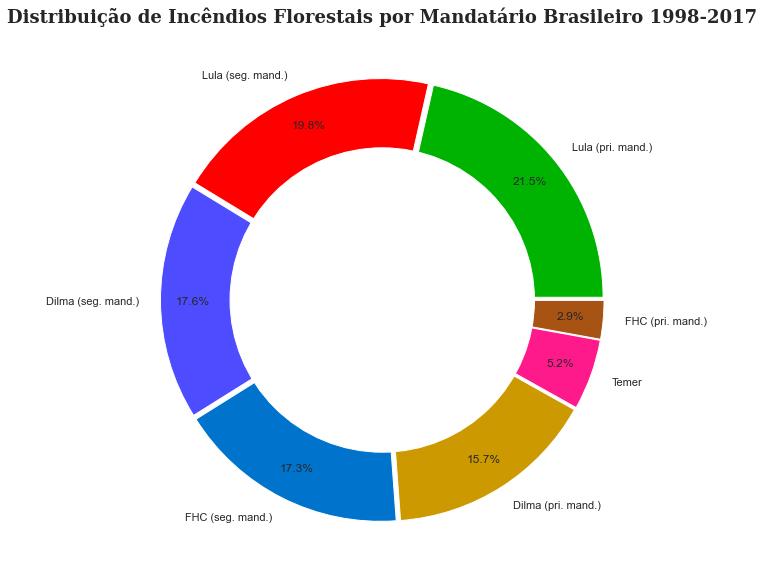

In [181]:
# Definindo parâmetros de tamanho:
fig, ax = plt.subplots(figsize=(10,10))

# Definindo variáveis que armazenam os valores dos dados coletados acima:
wild_fires = list(president_rank['Num_wild_fires'].values)
presidents = list(president_rank['President'].values)
colors = [
    '#00b300', # Verde 
    '#ff0000', # Vermelho
    '#4d4dff', # Lilás 
    '#0074cc', # Ciano
    '#cc9900', # Dourado 
    '#ff1a8c', # Rosa
    '#a65314'  # Marrom
    ]

# Ajustando distância entre fatias:
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02)

# Criando um gráfico de pizza:
plt.pie(wild_fires, labels=presidents, colors=colors, 
        autopct='%1.1f%%', pctdistance=0.85, explode=explode)

# Criando um círculo branco para inserir dentro do gráfico de pizza,
# tornando-o em um gráfico de rosca:
circle = plt.Circle((0,0), 0.70, fc='white')
figure = plt.gcf()
figure.gca().add_artist(circle)

plt.title('Distribuição de Incêndios Florestais por Mandatário Brasileiro 1998-2017',
           fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'})

plt.show()

Com a visualização de rosca, vemos que o período em que o Brasil sofreu mais incêndios florestais foi durante o **Primeiro Mandato de Luiz Inácio Lula da Silva**, tendo 21.5% dos dados referentes a esse período.

Também vemos que o período em que menos temos registros de incêndios é o final do **primeiro mandato de Fernando Henrique Cardoso** em 1998, porém isso era esperado pois o intervalo temporal dos dados se inicia quando o mandato de FHC se encerra em 1998. Como um dado mais relevante temos o segundo mandado de FHC, cujo período é completamente assimilado pelos dados.

Buscando ter uma visão diferente, utilizaremos um gráfico de barras simples para mostrar esses dados:

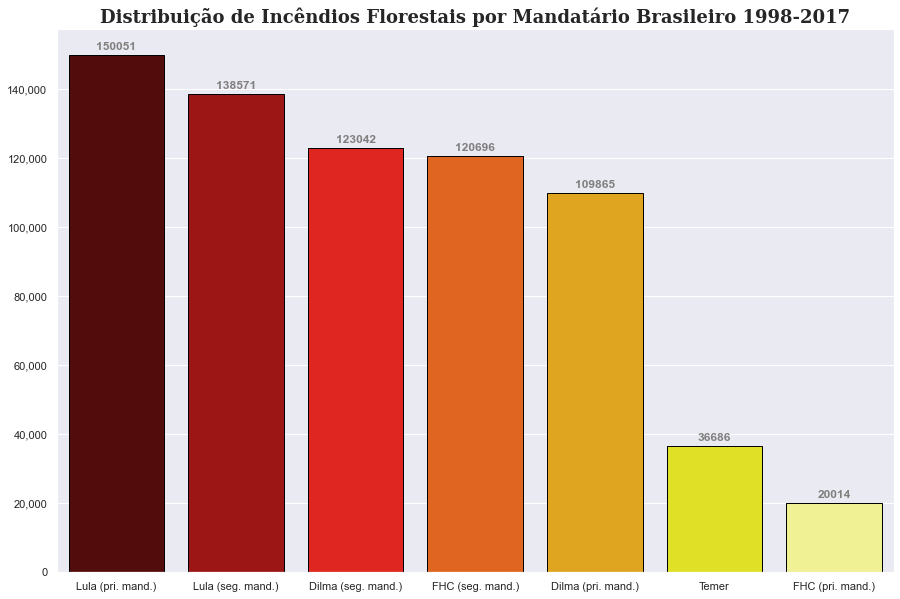

In [182]:
# Definindo parâmetros de tamanho:
fig, ax = plt.subplots(figsize=(15,10))

# Criando o gráfico de barras:
ax1 = sns.barplot(x='President', y='Num_wild_fires', data=president_rank,
                  edgecolor='black', palette='hot')

# Definindo for loop para criação de valores ao final das barras:
for (labels) in ax1.containers:
    ax.bar_label(labels, padding=3, fmt='%.0f', color='gray', fontweight='bold')

# Estilizando:
plt.title('Distribuição de Incêndios Florestais por Mandatário Brasileiro 1998-2017', 
           fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'})

plt.xlabel('')
plt.ylabel('')

# Modificando formatação dos ticks do eixo Y:
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda number, char: format(int(number), ',')))

plt.show()

## **<font color='gold'>3.</font> Como o número de incêndios nas diferentes regiões se comportam ao longo da série histórica e durante os governos mandatários do período?**

Antes de compreendermos o comportamento dos incêndios florestais por região, vamos buscar compreender mais afundo o que a questão anterior já propunha, como se comportam os dados ao longo da série histórica durante os diferentes governos.

Após isso, iremos analisar a situação das 5 regiões do Brasil.

### **Visão Geral: Por Governo**

In [183]:
# Coletando dados dos anos e total de incêndios:
fires_per_year = (
    data_clean
    .groupby('Year')['Num_wild_fires']
    .sum()
    .reset_index()
    .sort_values(by='Year')
)

# Visualizando dados:
fires_per_year.head()

,Year,Num_wild_fires
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600


Para visualizarmos uma série histórica de dados, uma opção recomendada é o `lineplot`:

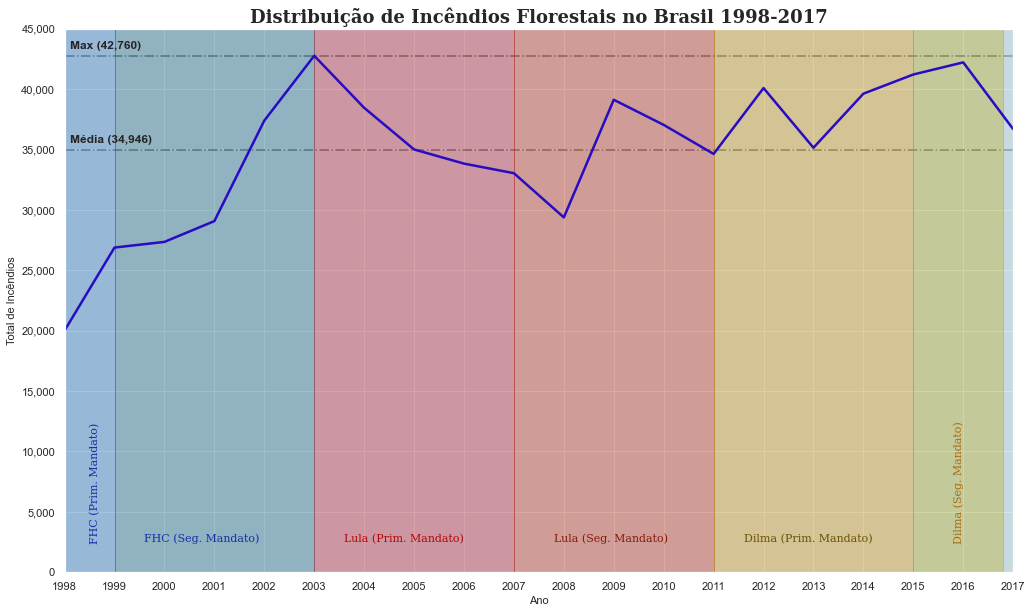

In [184]:
# Definindo parâmetros de tamanho:
fig, ax = plt.subplots(figsize=(17,10))

# Criano o lineplot:
ax = sns.lineplot(data=fires_per_year, x='Year', y='Num_wild_fires', 
                  color='#270cc2', lw=2.5, err_style=None)

# Estilizando:
plt.title('Distribuição de Incêndios Florestais no Brasil 1998-2017', 
           fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'})

plt.ylabel('Total de Incêndios', fontsize=11)
plt.xlabel('Ano', fontsize=11)

# Adicionando linha que representa o valor máximo do eixo Y:
plt.annotate('Max (42,760)', fontsize=12, fontweight='bold',
              xy=(1998.1, fires_per_year['Num_wild_fires'].max() + 600), 
              rotation=0)

plt.axhline(y=fires_per_year['Num_wild_fires'].max(), 
            linewidth=1.5, linestyle="dashdot",
            color='gray', zorder=1)

# Adicionando linha que representa o valor médio do eixo Y:
plt.annotate('Média (34,946)', fontsize=12, fontweight='bold',
              xy=(1998.1, fires_per_year['Num_wild_fires'].mean() + 600), 
              rotation=0)

plt.axhline(y=fires_per_year['Num_wild_fires'].mean(), 
            linewidth=1.5, linestyle="dashdot",
            color='gray', zorder=1)


# Alterando apresentação dos ticks no eixo X:
ax.xaxis.set_major_locator(plt.MaxNLocator(19)) # 19 pois são 19 anos no intervalo
ax.set_xlim(1998, 2017)
ax.set_ylim(0, 45000) # Forçando eixo Y a se iniciar no 0

# Formatando valores do eixo Y para ter uma vírgula:
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda number, char: format(int(number), ','))
    )

# Adicionando cores no background para representar perído de governantes:

# Fernando Henrique Cardoso (Primeiro Mandato):
plt.axvspan(1998, 1999, color='#1e6db3', alpha=0.4)

plt.text(1998.5, 2500, 'FHC (Prim. Mandato)', 
         fontdict={'size': 11, 'family': 'serif'}, color='#1431a6',
         rotation=90)

# Fernando Henrique Cardoso (Segundo Mandato):
plt.axvspan(1999, 2003, color='#0b6078', alpha=0.4)

plt.text(1999.6, 2500, 'FHC (Seg. Mandato)', 
         fontdict={'size': 11, 'family': 'serif'}, color='#1431a6')

# Lula (Primeiro Mandato):
plt.axvspan(2003, 2007, color='#a1182a', alpha=0.4)

plt.text(2003.6, 2500, 'Lula (Prim. Mandato)', 
         fontdict={'size': 11, 'family': 'serif'}, color='#b30707')

# Lula (Segundo Mandato):
plt.axvspan(2007, 2011, color='#ab2811', alpha=0.4)

plt.text(2007.8, 2500, 'Lula (Seg. Mandato)', 
         fontdict={'size': 11, 'family': 'serif'}, color='#851b08')

# Dilma (Primeiro Mandato):
plt.axvspan(2011, 2015, color='#b3890b', alpha=0.4)

plt.text(2011.6, 2500, 'Dilma (Prim. Mandato)', 
         fontdict={'size': 11, 'family': 'serif'}, color='#6b5206')

# Dilma (Segundo Mandato):
plt.axvspan(2015, 2016.8, color='#8c9918', alpha=0.4)

plt.text(2015.8, 2500, 'Dilma (Seg. Mandato)', 
         fontdict={'size': 11, 'family': 'serif'}, color='#ad6d0c',
         rotation=90)

# Temer:
plt.axvspan(2016.8, 2017, color='#93c4c7', alpha=0.4)

plt.show()

Com o gráfico podemos compreender melhor o comportamento do número de incêndios forestais entre 1998 e 2017 no Brasil.
Com esse panorama geral, podemos identificar alguns pontos de interesse:

- Por mais que os gráficos de rosca e de barra da questão 2 indicam que o maior índice de incêndios florestais no Brasil foi durante o primeiro mandato de Lula, com o gráfico acima mostrando a série histórica, vemos que a tendência dos incêndios foi de queda nesse período; 

    Ou seja, em números brutos, o primeiro mandato de Lula teve o maior número de incêndios florestais, porém sua tendência era de queda.

- Já o período do segundo mandato de Fernando Henrique Cardoso, por mais que em números brutos teve menos incêndios, apresenta uma tendência forte de aumento dos registros.

- Durante os dois mandatos de FHC, a série inicial é de cerca de 20.000 registros de incêndio, na saída de FHC do governo em 2003, o Brasil registrava seu maior valor, 42.760, mais que o dobro de quando FHC tomou posse para seu primeiro mandato em 1998.

A variação nos dados durante os diferentes governos pode nos proporcionar uma visão mais aprofundada dos incêndios florestais, para isso, vamos checar os valores dos incêndios de cada ano de troca de governo e analisar a variação nos dados durante o mandato de cada governante:


In [185]:
# Coletando registros de incêndios durante mudança de governos:
data_variance = (
    fires_per_year
    .query('Year in [1998, 1999, 2003, 2007, 2011, 2015, 2017]')
    .round()
    )

data_variance

,Year,Num_wild_fires
0,1998,20014.0
1,1999,26883.0
5,2003,42761.0
9,2007,33037.0
13,2011,34634.0
17,2015,41208.0
19,2017,36686.0


Com esses dados e com o gráfico, temos a possibilidade de constatar a variação no número de incêndios florestais por mandatário brasileiro:

| Governante                          | Incêndios na Posse| Incêndios na Saida    | Variação           |
|-------------------------------------|-------------------|-----------------------|--------------------|
| FHC (Prim. Mandato) - 1998 a 1999   | 20.014 (1998)     | 26.883 (1999)         | + 6.869 registros  |
| FHC (Seg. Mandato) - 1999 a 2003    | 26.883 (1999)     | 42.761 (2003)         | + 15.878 registros |
| Lula (Prim. Mandato) - 2003 a 2007  | 42.761 (2003)     | 33.037 (2007)         | - 9.724 registros  |
| Lula (Seg. Mandato) - 2007 a 2011   | 33.037 (2007)     | 34.634 (2011)         | + 1.597 registros  |
| Dilma (Prim. Mandato) - 2011 a 2015 | 34.634 (2011)     | 41.208 (2015)         | + 6.574 registros  |
| Temer - apenas 2017 nos dados       | 41.208 (2015)     | 36.686 (2017)         | - 4.522 registros  |

Vemos que as maiores variações positivas aconteceram nos mandatos de Fernando Henrique Cardoso, onde tivemos um aumento total de 22.747 registros de incêndio florestal no Brasil (desde 1998 até 2003).

A maior variação negativa ocorreu no primeiro governo de Lula, onde tivemos uma redução de 9.724 registros de incêndios florestais no Brasil.

### **Visão Geral: Por Região**

Para termos uma visão geral do comportamento dos registros de incêndio nas regiões brasileiras, vamos coletar os dados necessários e plotar novamente um gráfico de linhas, dessa vez com cada linha representado cada região brasileira ao longo da série histórica.

In [186]:
# Coletando dados dos anos, das regiões e do total de incêndios:
fires_per_region = (
    data_clean
    .groupby(['Region', 'Year'])['Num_wild_fires']
    .sum()
    .reset_index()
    .sort_values(by='Year')
)

# Visualizando dados:
fires_per_region.head()

,Region,Year,Num_wild_fires
0,Centro Oeste,1998,3254.508
80,Sul,1998,59.000
20,Nordeste,1998,6385.162
60,Sudeste,1998,5796.074
40,Norte,1998,4519.227


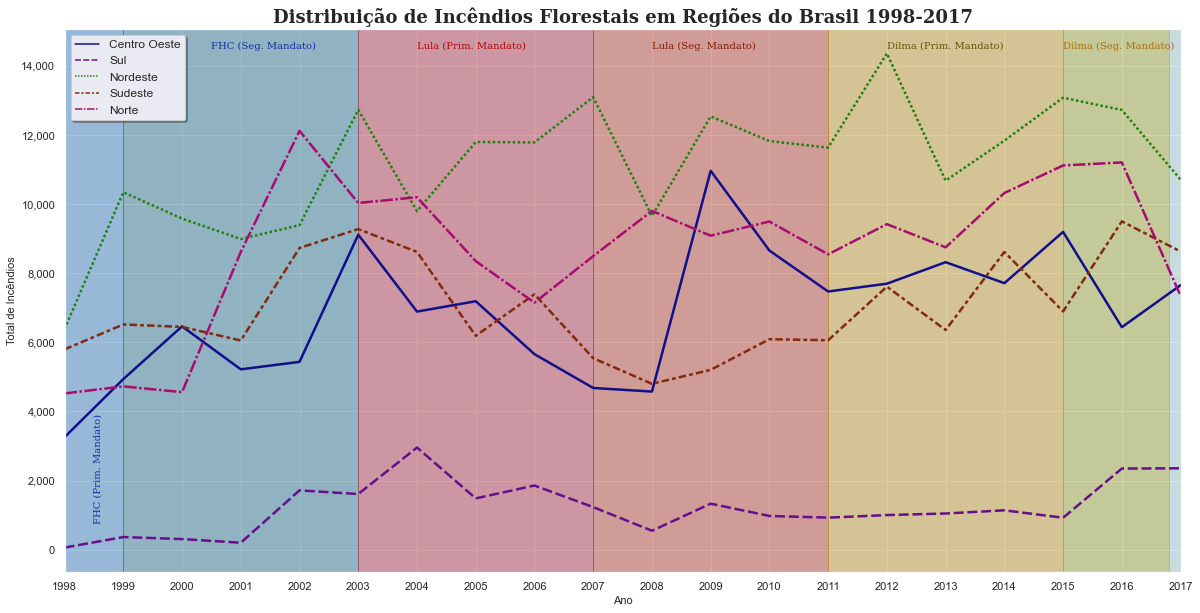

In [187]:
# Utilizando um plot de linhas relacionais:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.lineplot(data=fires_per_region, x='Year', y='Num_wild_fires',
                  hue='Region', lw=2.5, err_style=None, style='Region', 
                  palette=[
                           '#110f8a', # Centro-Oeste: Azul escuro 
                           '#650f8a', # Sul: Lilás
                           '#1f820d', # Nordeste: Verde
                           '#822a0d', # Sudeste: Marrom
                           '#a80c6f'  # Norte: Rosa
                          ])

# Estilizando:
plt.title('Distribuição de Incêndios Florestais em Regiões do Brasil 1998-2017', 
           fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'})

plt.ylabel('Total de Incêndios', fontsize=11)
plt.xlabel('Ano', fontsize=11)

# Alterando apresentação dos ticks no eixo X:
ax.xaxis.set_major_locator(plt.MaxNLocator(19)) # 19 pois são 19 anos no intervalo
ax.set_xlim(1998, 2017)

# Formatando valores do eixo Y para ter uma vírgula:
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda number, char: format(int(number), ',')))

plt.legend(fontsize=12, fancybox=True, shadow=True)

# Adicionando cores no background para representar perído de governantes:

# Fernando Henrique Cardoso (Primeiro Mandato):
plt.axvspan(1998, 1999, color='#1e6db3', alpha=0.4)

plt.text(1998.5, 800, 'FHC (Prim. Mandato)', 
         fontdict={'size': 10, 'family': 'serif'}, color='#1431a6',
         rotation=90)

# Fernando Henrique Cardoso (Segundo Mandato):
plt.axvspan(1999, 2003, color='#0b6078', alpha=0.4)

plt.text(2000.5, 14500, 'FHC (Seg. Mandato)', 
         fontdict={'size': 10, 'family': 'serif'}, color='#1431a6')

# Lula (Primeiro Mandato):
plt.axvspan(2003, 2007, color='#a1182a', alpha=0.4)

plt.text(2004, 14500, 'Lula (Prim. Mandato)', 
         fontdict={'size': 10, 'family': 'serif'}, color='#b30707')

# Lula (Segundo Mandato):
plt.axvspan(2007, 2011, color='#ab2811', alpha=0.4)

plt.text(2008, 14500, 'Lula (Seg. Mandato)', 
         fontdict={'size': 10, 'family': 'serif'}, color='#851b08')

# Dilma (Primeiro Mandato):
plt.axvspan(2011, 2015, color='#b3890b', alpha=0.4)

plt.text(2012, 14500, 'Dilma (Prim. Mandato)', 
         fontdict={'size': 10, 'family': 'serif'}, color='#6b5206')

# Dilma (Segundo Mandato):
plt.axvspan(2015, 2016.8, color='#8c9918', alpha=0.4)

plt.text(2015, 14500, 'Dilma (Seg. Mandato)', 
         fontdict={'size': 10, 'family': 'serif'}, color='#ad6d0c')

# Temer:
plt.axvspan(2016.8, 2017, color='#93c4c7', alpha=0.4)

plt.show()

Com o gráfico podemos analisar o comportamento das frequências de Incêndios Florestais nas regiões brasileiras. Como características:

- A região `Sul` aparece com o menor número de incêndios florestais na série histórica, porém temos que ter em mente que no Dataset o único estado da região Sul do Brasil é Santa Catarina, então não podemos concluir que a região Sul definitivamente é a que menos sofreu incêndios florestais no período destacado;

- É notavel que de 1999 até 2003 (período do segundo mandato de FHC), todas as regiões fecharam esse ciclo com mais incêndios florestais;

- A região que a quase todo momento da série histórica consta como a mais afetada por incêndios florestais é a `Nordeste`;

## **<font color='gold'>4.</font> Qual a estação do ano em que se houve mais e menos incêndios no Brasil?**

Após termos uma visão geral dos dados, compreendido o comportamento dos incêndios florestais por estado, região e por governante, agora vamos voltar as atenções para fatores climáticos em si, nominalmente as estações do ano e responder a pergunta proposta.

Para isso, iremos coletar os dados necessário do Dataset e realizar as comparações gráficos.

In [188]:
# Coletando dados necessários:
fires_by_season = (
    data_clean
    .groupby('Season', as_index=False)[['Num_wild_fires']]
    .sum()
    .sort_values(by='Num_wild_fires', ascending=False)
    )

fires_by_season.head()

,Season,Num_wild_fires
2,Summer,236387.223
0,Autumn,232767.938
3,Winter,136131.374
1,Spring,93637.538


Primeiramente, iremos checar os números absolutos de incêndios florestais por estação do ano. Para isso, utilizaremos um gráfico de barras simples:

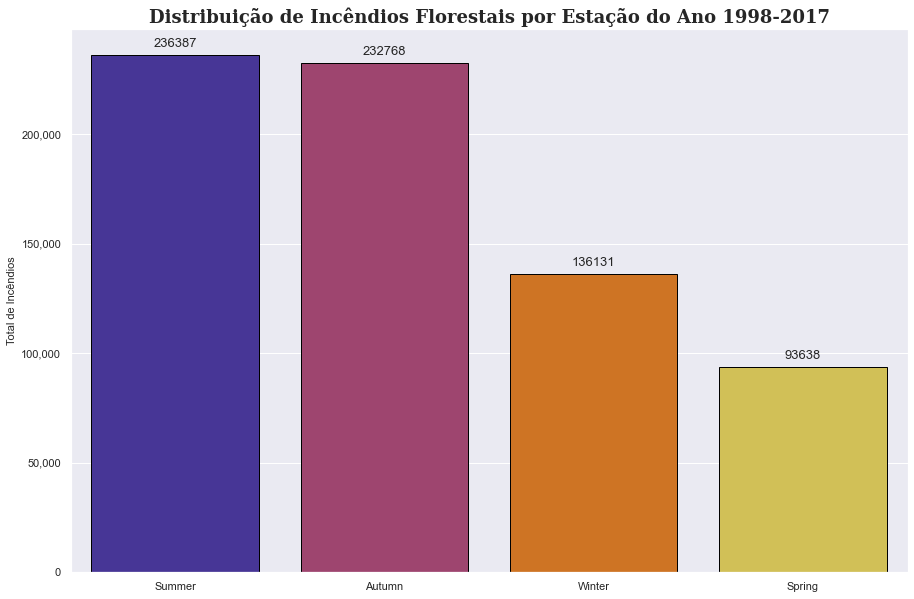

In [189]:
# Definindo tamanho:
fig, ax = plt.subplots(figsize=(15,10))

# Definindo gráfico de barras:
ax1 = sns.barplot(data=fires_by_season, x='Season', y='Num_wild_fires',
                  edgecolor='black', palette='CMRmap', ci=None)

# Definindo for loop para criação de valores ao final das barras:
for (labels) in ax1.containers:
    ax1.bar_label(labels, padding=5, fontsize=13, fmt='%.0f')

# Estilizando:
plt.title('Distribuição de Incêndios Florestais por Estação do Ano 1998-2017', 
           fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'})

plt.ylabel('Total de Incêndios', fontsize=11)
plt.xlabel('')

# Formatando valores do eixo Y para ter uma vírgula:
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda number, char: format(int(number), ',')))

plt.show()

Vemos que as estações do ano que mais tiveram incêndios florestais registrados foram o `Verão` e o `Outono`. Para podermos compreender melhor esse fato, vamos analisar o comportamento desses registros perante toda a série histórica, e para isso precisamos coletar mais dados, onde realizaremos duas visões:

- Comparativo anual do número de incêndios florestais por estação;

- Comparativo mensal do número de incêndios florestais por estação,

### **Comparativo Anual**

In [190]:
# Coletando dados:
seasons_anual = (
    data_clean
    .groupby(['Season', 'Year'], as_index=False)['Num_wild_fires']
    .sum()
    .sort_values(by='Num_wild_fires', ascending=False)
    )

seasons_anual.head()

,Season,Year,Num_wild_fires
6,Autumn,2004,15351.382
5,Autumn,2003,14942.378
59,Summer,2017,14198.769
51,Summer,2009,14142.990
44,Summer,2002,14122.686


Agora que temos os dados necessários, vamos visualizá-los utilizando outro lineplot:

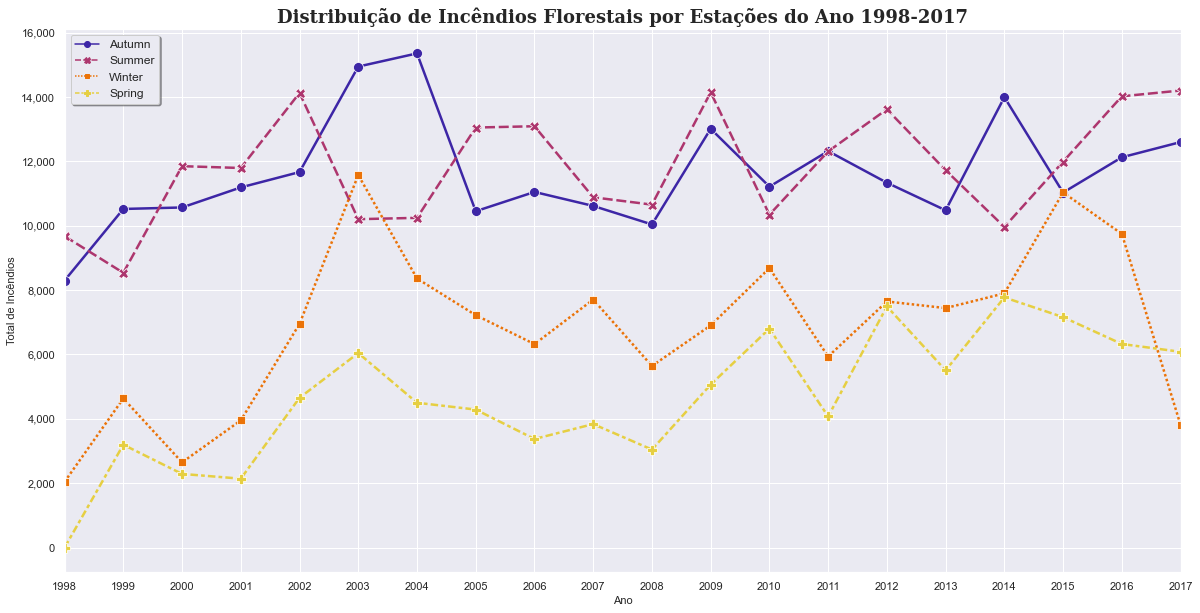

In [191]:
# Utilizando um plot de linhas relacionais:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.lineplot(data=seasons_anual, x='Year', y='Num_wild_fires',
                  hue='Season', lw=2.5, err_style=None, style='Season', 
                  palette='CMRmap', markers=True, markersize=10)

# Estilizando:
plt.title('Distribuição de Incêndios Florestais por Estações do Ano 1998-2017', 
           fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'})

plt.ylabel('Total de Incêndios', fontsize=11)
plt.xlabel('Ano', fontsize=11)

# Alterando apresentação dos ticks no eixo X:
ax.xaxis.set_major_locator(plt.MaxNLocator(19)) # 19 pois são 19 anos no intervalo
ax.set_xlim(1998, 2017)

# Formatando valores do eixo Y para ter uma vírgula:
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda number, char: format(int(number), ',')))

plt.legend(fontsize=12, fancybox=True, shadow=True)
plt.show()

Com o gráfico, temos algumas características relevantes:

- Em 2003, ano do pico geral dos incêndios florestais como vimos anteriormente, tivemos um aumento vertiginoso no número de registros durante o Outono, Primavera e principalmente no Inverno (que já vinha crescente desde 2000). Curiosamente, ao mesmo tempo em que todas as estações sofreram esse aumento em 2003, durante o verão tivemos um decréscimo relevante entre 2002 e 2003;

- De 2016 para 2017, o número de registros feitos de incêndios florestais no inverno teve uma queda brusca;

- Durante toda a série histórica, temos que mais incêndios ocorrem durante o Outono e o Verão.

Com a visão anual podemos ter uma noção do macro, porém, para uma análise mais precisa, podemos checar esses dados numa escala mensal.

### **Comparativo Mensal**

Primeiro, a coleta de dados:

In [192]:
seasons_month = (
    data_clean
    .groupby('Month', as_index=False)['Num_wild_fires']
    .sum()
    )

seasons_month

,Month,Num_wild_fires
0,April,28188.770
1,August,88050.435
2,December,57535.480
3,February,30848.050
4,January,47747.844
5,July,92326.113
6,June,56010.675
7,March,30717.405
8,May,34731.363
9,November,85508.054


Como os meses precisam estar na ordem correta, vamos atribuir uma nova coluna a esses dados contendo o número dos meses:

In [193]:
def month_to_num(df: pd.DataFrame) -> pd.DataFrame:
    '''Função que cria uma nova coluna no Dataframe constando
    o número de cada mês'''
    df['Month_num'] = df['Month'].apply(
        lambda month:
            1 if month == 'January' else
            2 if month == 'February' else
            3 if month == 'March' else
            4 if month == 'April' else
            5 if month == 'May' else
            6 if month == 'June' else
            7 if month == 'July' else
            8 if month == 'August' else
            9 if month == 'September' else
            10 if month == 'October' else
            11 if month == 'November' else
            12
       )

    return df

In [194]:
# Aplicando função:
seasons_month = month_to_num(seasons_month)

# Checando:
seasons_month

,Month,Num_wild_fires,Month_num
0,April,28188.770,4
1,August,88050.435,8
2,December,57535.480,12
3,February,30848.050,2
4,January,47747.844,1
5,July,92326.113,7
6,June,56010.675,6
7,March,30717.405,3
8,May,34731.363,5
9,November,85508.054,11


Agora podemos organizar os dados para o plot:

In [195]:
# Organizando dados por mês:
seasons_month = seasons_month.sort_values(by='Month_num')

seasons_month

,Month,Num_wild_fires,Month_num
4,January,47747.844,1
3,February,30848.050,2
7,March,30717.405,3
0,April,28188.770,4
8,May,34731.363,5
6,June,56010.675,6
5,July,92326.113,7
1,August,88050.435,8
11,September,58578.305,9
10,October,88681.579,10


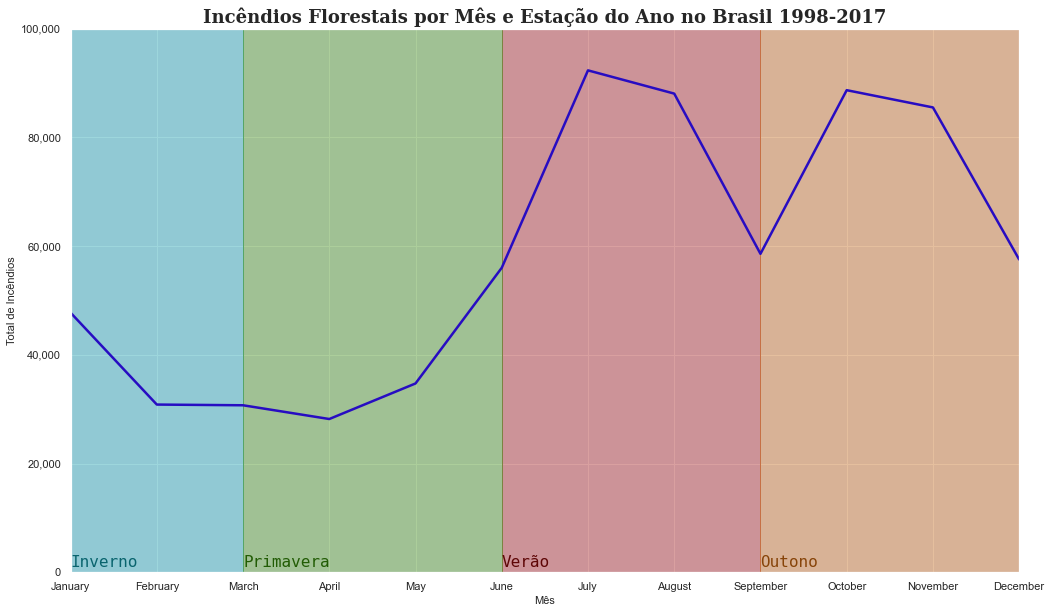

In [196]:
# Definindo parâmetros de tamanho:
fig, ax = plt.subplots(figsize=(17,10))

# Criano o lineplot:
ax = sns.lineplot(data=seasons_month, x='Month', y='Num_wild_fires', 
                  color='#270cc2', lw=2.5, err_style=None)

# Estilizando:
plt.title('Incêndios Florestais por Mês e Estação do Ano no Brasil 1998-2017', 
           fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'})

plt.ylabel('Total de Incêndios', fontsize=11)
plt.xlabel('Mês', fontsize=11)

# Formatando valores do eixo Y para ter uma vírgula:
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda number, char: format(int(number), ',')))

# Colcando eixo Y para inciar do 0 e eixo X para ajustar a página aos meses:
ax.set_ylim(0, 100000)
ax.set_xlim('January', 'December')

# Adicionando cores no background para representar as estações do ano:

# Verão:
plt.axvspan('June', 'September', color='#a11212', alpha=0.4)

plt.text('June', 1000, 'Verão', 
          fontdict={'size': 16, 'family': 'monospace'}, color='#5e0606')

# Outono:
plt.axvspan('September', 'December', color='#bf600d', alpha=0.4)

plt.text('September', 1000, 'Outono', 
          fontdict={'size': 16, 'family': 'monospace'}, color='#874409')

# Inverno:
plt.axvspan('January', 'March', color='#0c99a8', alpha=0.4)

plt.text('January', 1000, 'Inverno', 
          fontdict={'size': 16, 'family': 'monospace'}, color='#09646e')

# Primavera:
plt.axvspan('March', 'June', color='#318507', alpha=0.4)

plt.text('March', 1000, 'Primavera', 
          fontdict={'size': 16, 'family': 'monospace'}, color='#225c05')

plt.show()

De acordo com o gráfico, temos as seguintes informações:

- Na série histórica, o verão e o outono realmente são os de maior intensidade de incêndios ambientais;

- O mês de Setembro marca o ponto de virada dos registros, onde eles tendem a cair desde agosto no verão e voltam a crescer em setembro no outono;

A série histórica seria (de forma generalizada) uma linha sinuosa que tende a cair de Novembro a Abril e a crescer de Maio a Outubro se não fosse a aparente queda brusca nos registros em Setembro.

# <font color='gold'>***Conclusão***</font>

Com esse projeto podemos ter uma visão de diferentes pontos de vista acerca dos incêndios florestais no Brasil.

- A distribuição dos registros por estados, onde encontramos que o estado mais afetado por esses incidentes é Mato Grosso e o menos afetado Sergipe;

- A região mais afetada pelos incêndios historicamente é o Nordeste e a menos afetada o Sul (lembrando que tinhamos apenas Santa Catarina nos registros);

- O primeiro mandato de Lula teve a maior porcentagem de incêndios florestais em números brutos (21.5% dos registros) e o primeiro mandato de Fernando Henrique Cardoso o de menor porcentagem em números brutos (2.9%), porém o primeiro governo de FHC é também o que contém menos dados no Dataset;

- Na série histórica, o primeiro mandato de Lula foi o que constou ter a maior queda nos índices de incêndios florestais, demonstrando uma queda de 9.724 registros durante seu governo. Já o governo que demonstrou a maior alta nos incidentes florestais foi o segundo mandato de Fernando Henrique Cardoso, com uma crescente de 15.878 registros;

- No Brasil entre 1998 e 2017 se teve mais incêndios durante o Verão e Outono e menos durante o Inverno e Primavera, tendo os meses com maior número de incêndios o período entre Junho e Novembro.